Original image dimensions: 607x799


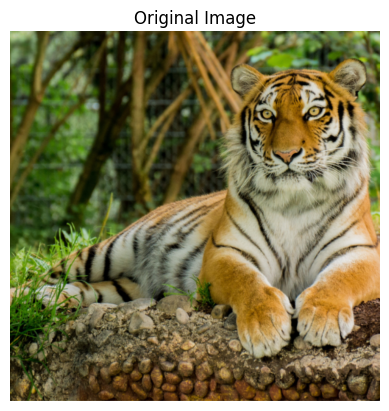

In [65]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("tiger.png")
# Convert the image from BGR to RGB for displaying
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width, _ = image.shape
print(f"Original image dimensions: {height}x{width}")

# Make the image 1:1 by cropping it to a square
min_dim = min(height, width)
top = (height - min_dim) // 2
left = (width - min_dim) // 2
image = image[top:top + min_dim, left:left + min_dim]

# Display the image
plt.imshow(image)
plt.axis("off")
plt.imsave("tiger_square.png", image)
plt.title("Original Image")
plt.show()

# Crop

Cropped image dimensions: 400x400


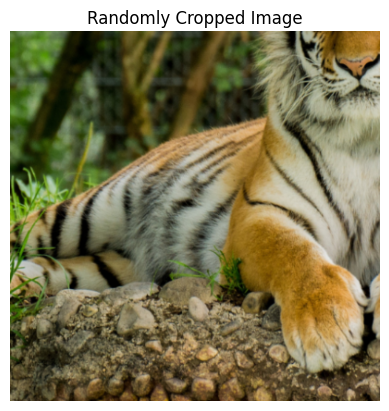

In [ ]:
import numpy as np

# Define the crop size
crop_height, crop_width = 400, 400

# Generate random top-left corner for the crop
top = np.random.randint(0, height - crop_height)
left = np.random.randint(0, width - crop_width)

# Perform the crop
cropped_image = image[top:top + crop_height, left:left + crop_width]
print(f"Cropped image dimensions: {cropped_image.shape[0]}x{cropped_image.shape[1]}")

# Display the cropped image
plt.imshow(cropped_image)
plt.axis("off")
#plt.imsave("cropped_image.png", cropped_image)
plt.title("Randomly Cropped Image")
plt.show()

# Central Crop

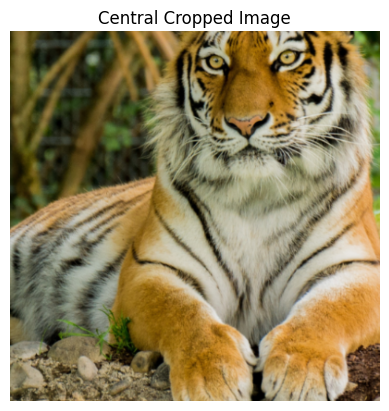

In [ ]:
# Calculate the center of the image
center_y, center_x = height // 2, width // 2

# Calculate the top-left corner of the central crop
top = max(center_y - crop_height // 2, 0)
left = max(center_x - crop_width // 2, 0)

# Perform the central crop
central_cropped_image = image[top:top + crop_height, left:left + crop_width]

# Display the central cropped image
plt.imshow(central_cropped_image)
plt.axis("off")
#plt.imsave("central_cropped_image.png", central_cropped_image)
plt.title("Central Cropped Image")
plt.show()

# Flip

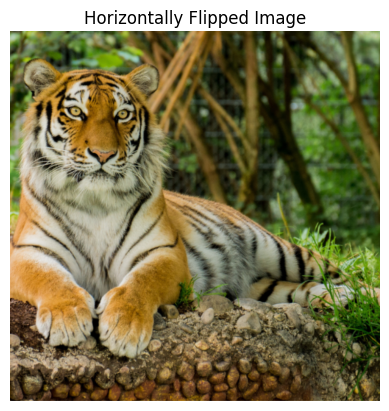

In [ ]:
# Flip the image horizontally
flipped_image = cv2.flip(image, 1)

# Display the flipped image
plt.imshow(flipped_image)
plt.axis("off")
#plt.imsave("flipped_image.png", flipped_image)
plt.title("Horizontally Flipped Image")
plt.show()

# Rotate

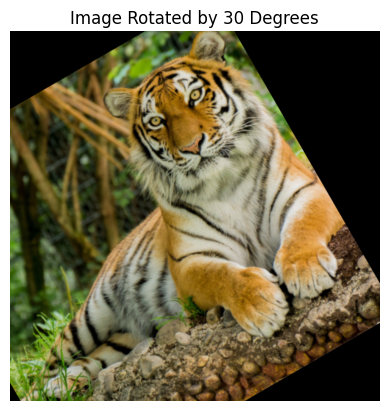

In [4]:
# Calculate the center of the image
center = (width // 2, height // 2)

# Define the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D(center, 30, 1.0)

# Perform the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Make sure the rotated image is 1:1
rotated_image = rotated_image[top:top + min_dim, left:left + min_dim]


# Display the rotated image
plt.imshow(rotated_image)
plt.axis("off")
plt.imsave("rotated_image.png", rotated_image)
plt.title("Image Rotated by 30 Degrees")
plt.show()

# Blur

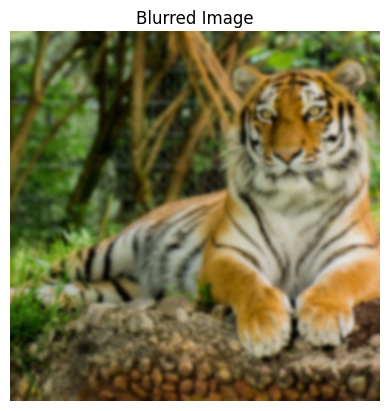

In [5]:
# Apply Gaussian blur to the image
blurred_image = cv2.GaussianBlur(image, (15, 15), 0)

# Display the blurred image
plt.imshow(blurred_image)
plt.axis("off")
plt.imsave("blurred_image.png", blurred_image)
plt.title("Blurred Image")
plt.show()

# Saturation

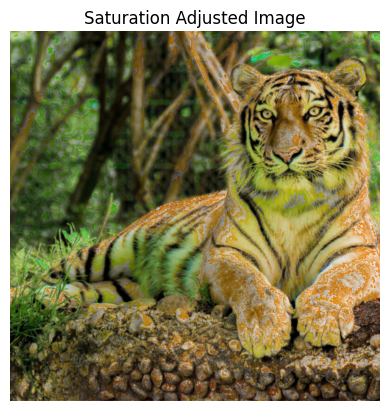

In [30]:
# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# Increase the saturation by a factor (e.g., 1.5)
saturation_factor = 4
hsv_image[:, :, 1] = np.clip(hsv_image[:, :, 1] * saturation_factor, 0, 255)

# Convert back to RGB color space
saturation_adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Display the saturation-adjusted image
plt.imshow(saturation_adjusted_image)
plt.axis("off")
plt.imsave("saturation_adjusted_image.png", saturation_adjusted_image)
plt.title("Saturation Adjusted Image")
plt.show()

# Hue

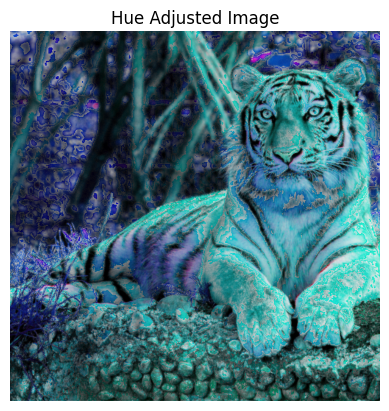

In [35]:
# Adjust the hue by a certain value (e.g., 30 degrees)
hue_adjustment = 30
hsv_image[:, :, 0] = (hsv_image[:, :, 0] + hue_adjustment) % 180

# Convert back to RGB color space
hue_adjusted_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

# Display the hue-adjusted image
plt.imshow(hue_adjusted_image)
plt.axis("off")
plt.imsave("hue_adjusted_image.png", hue_adjusted_image)
plt.title("Hue Adjusted Image")
plt.show()

# Noise

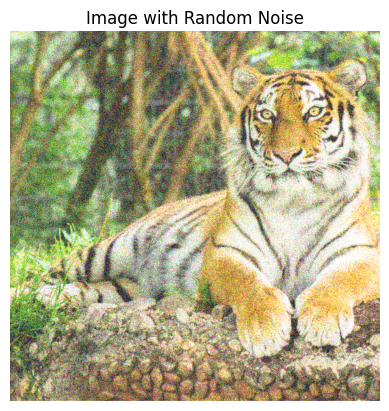

In [39]:
# Add random noise to the image
noise = np.random.randint(0, 128, image.shape, dtype='uint8')  # Generate random noise
noisy_image = cv2.add(image, noise)  # Add noise to the image

# Display the noisy image
plt.imshow(noisy_image)
plt.axis("off")
plt.imsave("noisy_image.png", noisy_image)
plt.title("Image with Random Noise")
plt.show()

# Erase

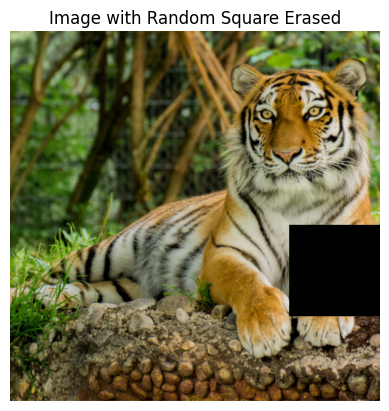

In [58]:
image_e = np.copy(image)

# Define the size of the square to erase
square_size = 150

# Generate random top-left corner for the square
erase_top = np.random.randint(0, height - square_size)
erase_left = np.random.randint(0, width - square_size)

# Erase the square by setting its pixel values to zero
image_e[erase_top:erase_top + square_size, erase_left:erase_left + square_size] = 0

# Display the image with the erased square
plt.imshow(image_e)
plt.axis("off")
plt.imsave("image_with_square_erased.png", image_e)
plt.title("Image with Random Square Erased")
plt.show()

# De-texturing

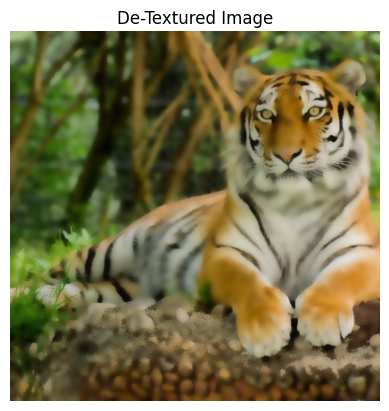

In [64]:
# Apply bilateral filter for de-texturing
detailed_image = cv2.bilateralFilter(image, d=15, sigmaColor=150, sigmaSpace=150)

# Display the de-textured image
plt.imshow(detailed_image)
plt.axis("off")
plt.imsave("de_textured_image.png", detailed_image)
plt.title("De-Textured Image")
plt.show()